In [72]:
import open3d as o3d
import numpy as np
import alphashape
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon

In [73]:
def polygon_to_obj(polygon, filename):
    vertices = []
    faces = []
    vertex_index = 1

    # MultiPolygonの場合、各ポリゴンを処理
    if isinstance(polygon, MultiPolygon):
        polygons = polygon.geoms
    # Polygonの場合、そのまま処理
    elif isinstance(polygon, Polygon):
        polygons = [polygon]
    else:
        raise TypeError("Input must be a Polygon or MultiPolygon")

    # 各ポリゴンを処理
    for poly in polygons:
        # 外部リング (輪郭) の頂点を取得
        exterior_coords = np.array(poly.exterior.coords)
        
        # 外部リングの頂点をリストに追加
        for coord in exterior_coords:
            vertices.append(f"v {coord[0]} {coord[1]} 0.0")

        # 外部リングの面を定義
        face_indices = list(range(vertex_index, vertex_index + len(exterior_coords)))
        faces.append(f"f {' '.join(map(str, face_indices))}")
        
        # 内部リング（穴）がある場合
        for interior in poly.interiors:
            interior_coords = np.array(interior.coords)
            
            # 内部リングの頂点をリストに追加
            for coord in interior_coords:
                vertices.append(f"v {coord[0]} {coord[1]} 0.0")
            
            # 内部リングの面を定義
            face_indices = list(range(vertex_index, vertex_index + len(interior_coords)))
            faces.append(f"f {' '.join(map(str, face_indices))}")
        
        # 次のポリゴン用に頂点のインデックスを更新
        vertex_index += len(exterior_coords) + sum(len(interior.coords) for interior in poly.interiors)

    # OBJファイルに書き出し
    with open(filename, 'w') as obj_file:
        obj_file.write("\n".join(vertices) + "\n")
        obj_file.write("\n".join(faces) + "\n")


In [74]:
"""
50:3
73:4
75:2
"""
# PCDファイルを読み込む
pcd = o3d.io.read_point_cloud("/home/aichi2204/Documents/bkl2go/20240412-library2/minimini_1/sp_25/ground_merged.pcd")

# 点群データをNumPy配列に変換
points = np.asarray(pcd.points)

# XY平面にプロットするために、z座標を無視
xy_points = points[:, :2]  # XY座標のみ取得

"""
ダウンサンプリング x[m]
店の最短距離 : x[m]
ボール直径: 2x[m]
50mm = 1/(2*0.05) = 10
100m = 1/(2*0.1) = 5
"""

'\nダウンサンプリング x[m]\n店の最短距離 : x[m]\nボール直径: 2x[m]\n50mm = 1/(2*0.05) = 10\n100m = 1/(2*0.1) = 5\n'

In [75]:
# アルファシェイプの実行
alpha = 1/0.065 # 適切なalpha値を調整してください
alpha_shape = alphashape.alphashape(xy_points, alpha)
print("done",type(alpha_shape))


done <class 'shapely.geometry.polygon.Polygon'>


In [76]:
polygon_to_obj(alpha_shape, '1_0065.obj')

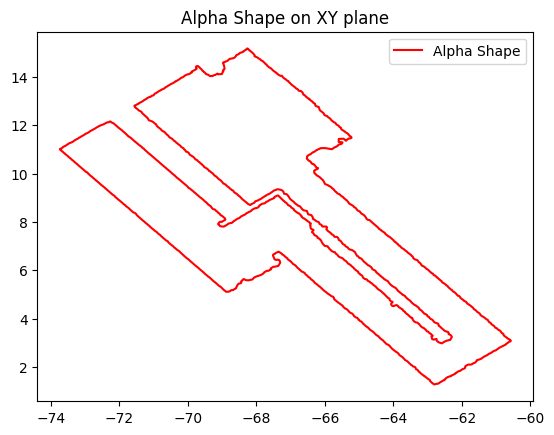

In [59]:
# プロット
fig, ax = plt.subplots()
# ax.scatter(xy_points[:, 0], xy_points[:, 1], color='blue', label='Points')

# アルファシェイプのプロット
if alpha_shape is not None:
    ax.plot(*alpha_shape.exterior.xy, color='red', label='Alpha Shape')

plt.title("Alpha Shape on XY plane")
plt.legend()
plt.show()